

##    **1. 쌍용 C&E** 
> : 시멘트 대장주로 잘 알려진 쌍용 C&E는 1962년 설립되어 시멘트사업, 석회석사업, 해운사업, 환경자원사업, 임대사업을 영위하는 회사.



2022년 3월 9일, 20대 대통령 선거에서 국민의힘 소속 윤석열 후보가 당선되면서 재건축, 재개발에 대한 기대감이 커지는 중 → 따라서 그 핵심 재료가 되는 건자재 회사에도 많은 관심 → 그중에서도 건설의 필수 소재인 시멘트 업종도 많은 기대를 받고 있기 때문에 주가 상승 예상






##    **2. 신한지주**
> : 신한금융 계열사에 대한 지배/경영관리, 종속회사에 대한 자금지원 등을 주요 사업목적으로 하는 금융지주회사

코로나로 경제가 어려워지면서 역대 최대 저금리 현상이 있었음 → 1~2년 정도 0%에 가까운 저금리가 이어지다가 이제 다시 정상화가 되어가고 있음 → 한국은행 기준금리는 꾸준히 올라가고 있음 → 금리상승으로 인한 주가 상승 예상





In [ ]:
import pandas as pd
import os
import sys
import urllib.request
import json
import re
import numpy as np
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
import nltk
nltk.download('all')  # Natural Language ToolKit 모든 패키지 설치

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
!pip install wordcloud  # 워드클라우드 설치

In [ ]:
import glob
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

from wordcloud import WordCloud, STOPWORDS

In [ ]:
def clean_html(x):
  #https://predictor-ver1.tistory.com/4
  x = re.sub("\&\w*\;","",x)
  x = re.sub("<.*?>","",x)
  return x

## 쌍용 C&E

In [ ]:
client_id = "gnndtrcusE4MKxX3qhpp" #발급받은 ID 입력
client_secret = "yk9yEZUB4k" #발급받은 PW 입력
encText = urllib.parse.quote("쌍용 C&E") # 검색할 단어 입력
start =1
display = 100
url = "https://openapi.naver.com/v1/search/news?query=" + encText +"&start=" + str(start) + "&display=" + str(display) # json 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    result = response_body.decode('utf-8')
    #print(result)
else:
    print("Error Code:" + rescode)

In [ ]:
result_json = json.loads(result)

In [ ]:
df_ssang = pd.DataFrame(result_json["items"])

In [ ]:
df_ssang

,title,originallink,link,description,pubDate
0,尹공약 호재에 원자재 수급난까지…시멘트株 상승세 탔다,https://view.asiae.co.kr/article/2022040509482...,https://news.naver.com/main/read.naver?mode=LS...,5일 한국거래소에 따르면 <b>쌍용C&amp;E</b>는 전날 2.21% 오른 83...,"Tue, 05 Apr 2022 11:31:00 +0900"
1,[경제뉴스에 돈이 보인다] 점진적인 식품 마진 스프레드 확대 기대! 'CJ제일제...,https://news.mtn.co.kr/news-detail/20220405103...,https://news.mtn.co.kr/news-detail/20220405103...,"건설 성수기, 시멘트 수급 대란 우려… 주목할 관련株는?- 유연탄 가격 상승 및 부...","Tue, 05 Apr 2022 10:48:00 +0900"
2,경동나비엔 3.23% 상승 '미소'…KRX 건설 구성종목 중 주가상승률 '선두',http://www.pinpointnews.co.kr/news/articleView...,http://www.pinpointnews.co.kr/news/articleView...,"25% 상승), <b>쌍용C&amp;E</b> 8330원 (2.21% 상승) KRX...","Tue, 05 Apr 2022 06:30:00 +0900"
3,"시멘트 관련주, 어디까지 오를까… 가격 인상 기대감에 연일 '강세'",http://moneys.mt.co.kr/news/mwView.php?no=2022...,https://news.naver.com/main/read.naver?mode=LS...,"같은 날 삼표시멘트(2.91%, 이하 종가 기준) <b>쌍용C&amp;E</b>(2...","Tue, 05 Apr 2022 05:25:00 +0900"
4,1분기 영업익 ‘우등생’…원자재 값이 갈랐다,https://www.joongang.co.kr/article/25060901,https://news.naver.com/main/read.naver?mode=LS...,시멘트 업체 <b>쌍용C&amp;E</b>(-37.2%)의 영업이익 전망치는 유연탄...,"Tue, 05 Apr 2022 00:04:00 +0900"
...,...,...,...,...,...
95,박스권 장세에 안정적 수익 매력↑...'분기 배당株' 노려볼까,http://www.newspim.com/news/view/20220324001157,http://www.newspim.com/news/view/20220324001157,25일 금융투자업계에 따르면 꾸준히 분기 배당 정책을 시행해온 국내 대표 분기배당주...,"Fri, 25 Mar 2022 08:07:00 +0900"
96,한전기술 4.48%↑…KRX 건설 구성종목 중 주가상승률 'TOP',http://www.pinpointnews.co.kr/news/articleView...,http://www.pinpointnews.co.kr/news/articleView...,하락) KRX 건설 지수 구성종목 중 시가총액 TOP 5 포스코케미칼 11만3000...,"Fri, 25 Mar 2022 06:32:00 +0900"
97,"[공매도 TOP 10 종목] 코스피, 두산중공업 공매도 1위…대한전선-HMM-KB금...",http://www.econonews.co.kr/news/articleView.ht...,http://www.econonews.co.kr/news/articleView.ht...,"이어 대한전선(84만9924주), HMM(43만556주), KB금융(31만1129주...","Thu, 24 Mar 2022 21:32:00 +0900"
98,건설업계 떨고 있다…내달부터 시멘트 대란 가능성 상승,http://www.newswatch.kr/news/articleView.html?...,http://www.newswatch.kr/news/articleView.html?...,"업계에선 <b>쌍용C&amp;E</b>, 한일, 아세아, 성신양회 등 주요 시멘트 ...","Thu, 24 Mar 2022 18:02:00 +0900"


In [ ]:
df_ssang['title'] = df_ssang['title'].apply(lambda x: clean_html(x))
df_ssang['description'] = df_ssang['description'].apply(lambda x: clean_html(x))

In [ ]:
df_ssang.head()

,title,originallink,link,description,pubDate
0,尹공약 호재에 원자재 수급난까지…시멘트株 상승세 탔다,https://view.asiae.co.kr/article/2022040509482...,https://news.naver.com/main/read.naver?mode=LS...,5일 한국거래소에 따르면 쌍용CE는 전날 2.21% 오른 8330원에 거래를 마쳤다...,"Tue, 05 Apr 2022 11:31:00 +0900"
1,[경제뉴스에 돈이 보인다] 점진적인 식품 마진 스프레드 확대 기대! 'CJ제일제...,https://news.mtn.co.kr/news-detail/20220405103...,https://news.mtn.co.kr/news-detail/20220405103...,"건설 성수기, 시멘트 수급 대란 우려… 주목할 관련株는?- 유연탄 가격 상승 및 부...","Tue, 05 Apr 2022 10:48:00 +0900"
2,경동나비엔 3.23% 상승 '미소'…KRX 건설 구성종목 중 주가상승률 '선두',http://www.pinpointnews.co.kr/news/articleView...,http://www.pinpointnews.co.kr/news/articleView...,"25% 상승), 쌍용CE 8330원 (2.21% 상승) KRX 건설 지수 구성종목 ...","Tue, 05 Apr 2022 06:30:00 +0900"
3,"시멘트 관련주, 어디까지 오를까… 가격 인상 기대감에 연일 '강세'",http://moneys.mt.co.kr/news/mwView.php?no=2022...,https://news.naver.com/main/read.naver?mode=LS...,"같은 날 삼표시멘트(2.91%, 이하 종가 기준) 쌍용CE(2.21%) 한일시멘트(...","Tue, 05 Apr 2022 05:25:00 +0900"
4,1분기 영업익 ‘우등생’…원자재 값이 갈랐다,https://www.joongang.co.kr/article/25060901,https://news.naver.com/main/read.naver?mode=LS...,시멘트 업체 쌍용CE(-37.2%)의 영업이익 전망치는 유연탄 값 급등에 한 달 만...,"Tue, 05 Apr 2022 00:04:00 +0900"


In [ ]:
# 제목 추출
all_title_ssang = df_ssang['title']

all_title_ssang  # 출력하여 내용 확인

0                         尹공약 호재에 원자재 수급난까지…시멘트株 상승세 탔다
1       [경제뉴스에 돈이 보인다] 점진적인 식품 마진 스프레드 확대 기대! 'CJ제일제...
2          경동나비엔 3.23% 상승 '미소'…KRX 건설 구성종목 중 주가상승률 '선두'
3                 시멘트 관련주, 어디까지 오를까… 가격 인상 기대감에 연일 '강세'
4                              1분기 영업익 ‘우등생’…원자재 값이 갈랐다
                            ...                        
95                   박스권 장세에 안정적 수익 매력↑...'분기 배당株' 노려볼까
96                한전기술 4.48%↑…KRX 건설 구성종목 중 주가상승률 'TOP'
97    [공매도 TOP 10 종목] 코스피, 두산중공업 공매도 1위…대한전선-HMM-KB금...
98                        건설업계 떨고 있다…내달부터 시멘트 대란 가능성 상승
99              포스코케미칼 3.74% 급등…KRX 건설 구성종목 중 주가상승률 상위권
Name: title, Length: 100, dtype: object

In [ ]:
# 특수문자 제거
import re

def clean_text(inputString):
  text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
  return text_rmv

In [ ]:
words = []
for title in all_title_ssang:
    title = clean_text(title)
    words.append(title.split())

In [ ]:
print(words)

[['尹공약', '호재에', '원자재', '수급난까지', '시멘트株', '상승세', '탔다'], ['경제뉴스에', '돈이', '보인다', '점진적인', '식품', '마진', '스프레드', '확대', '기대', 'CJ제일제'], ['경동나비엔', '3', '23%', '상승', '미소', 'KRX', '건설', '구성종목', '중', '주가상승률', '선두'], ['시멘트', '관련주', '어디까지', '오를까', '가격', '인상', '기대감에', '연일', '강세'], ['1분기', '영업익', '우등생', '원자재', '값이', '갈랐다'], ['쌍용CE', '첫', '여성', '사외이사에', '송현주', '전', '안양시의원', '선임'], ['에쓰오일', '실적', '전망', '한달만에', '55%↑', '유가에', '엇갈리는', '희비'], ['美', '러', '자원전쟁', '유탄', '韓', '시멘트', '생산할수록', '적자', '늪', '원자재', '공급망', '패권'], ['韓', '탄소감축', '목표', '유럽의', '2배', '기업들', '年', '2', '5조', '추가', '부담해야'], ['탄소중립', '대못', '수조원', '청구서', '날아든다', '기업들', '초비상'], ['판매가격', '인상', '기대감', '고려시멘트', '한', '달간', '40%', '올라'], ['재고', '이틀치뿐', '압박', '17', '19%', '인상', '일방통보', '중소레미콘', '발', '동동'], ['동해시', '산불대응', '이재민', '지원', '군부대', '기관', '단체', '등에', '감사패', '전달'], ['시멘트대란', '대책', '정부', '업계', '엇박자', '행보'], ['중대재해법', '시행', '이후', '1Q', 'DL이앤씨', '현대건설', '사망사고', '발생', '빨간불'], ['특징주', '시멘트株', '유연탄', '수급', '불안', '지속', '등에', '강세'], ['실적시즌', '개막', '코스

In [ ]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  # 작업 내용 확인

['尹공약', '호재에', '원자재', '수급난까지', '시멘트株', '상승세', '탔다', '경제뉴스에', '돈이', '보인다', '점진적인', '식품', '마진', '스프레드', '확대', '기대', 'CJ제일제', '경동나비엔', '3', '23%', '상승', '미소', 'KRX', '건설', '구성종목', '중', '주가상승률', '선두', '시멘트', '관련주', '어디까지', '오를까', '가격', '인상', '기대감에', '연일', '강세', '1분기', '영업익', '우등생', '원자재', '값이', '갈랐다', '쌍용CE', '첫', '여성', '사외이사에', '송현주', '전', '안양시의원', '선임', '에쓰오일', '실적', '전망', '한달만에', '55%↑', '유가에', '엇갈리는', '희비', '美', '러', '자원전쟁', '유탄', '韓', '시멘트', '생산할수록', '적자', '늪', '원자재', '공급망', '패권', '韓', '탄소감축', '목표', '유럽의', '2배', '기업들', '年', '2', '5조', '추가', '부담해야', '탄소중립', '대못', '수조원', '청구서', '날아든다', '기업들', '초비상', '판매가격', '인상', '기대감', '고려시멘트', '한', '달간', '40%', '올라', '재고', '이틀치뿐', '압박', '17', '19%', '인상', '일방통보', '중소레미콘', '발', '동동', '동해시', '산불대응', '이재민', '지원', '군부대', '기관', '단체', '등에', '감사패', '전달', '시멘트대란', '대책', '정부', '업계', '엇박자', '행보', '중대재해법', '시행', '이후', '1Q', 'DL이앤씨', '현대건설', '사망사고', '발생', '빨간불', '특징주', '시멘트株', '유연탄', '수급', '불안', '지속', '등에', '강세', '실적시즌', '개막', '코스피', '박스권에', '실적', '펀더멘털', '평가', '

In [ ]:
count = Counter(words2)

count  # 출력하여 내용 확인

Counter({'0': 1,
         '10': 3,
         '10억': 1,
         '11회': 1,
         '12%': 1,
         '14%': 1,
         '15%': 1,
         '17': 1,
         '17개': 1,
         '19%': 1,
         '1Q': 1,
         '1만원': 1,
         '1분기': 1,
         '1위': 6,
         '2': 2,
         '20조': 1,
         '21%': 1,
         '23%': 1,
         '2배': 1,
         '2차전지株': 1,
         '2차전지주': 1,
         '3': 3,
         '3분': 1,
         '3월': 3,
         '4': 3,
         '4%대': 1,
         '40%': 1,
         '48%↑': 1,
         '4월': 1,
         '4월부터': 1,
         '55%↑': 1,
         '5조': 1,
         '7': 2,
         '72%': 1,
         '74%': 1,
         '8만→9만→11만원': 1,
         '8종목': 1,
         '9': 1,
         '95%': 1,
         '98%': 1,
         'CJ제일제': 1,
         'DL이앤씨': 1,
         'ESG': 2,
         'ESG경영': 7,
         'HDC': 1,
         'HDC현대산업개발': 1,
         'HMM': 3,
         'IB토마토': 1,
         'IB피플': 1,
         'KB금융': 1,
         'KRX': 8,
         'KRX건설': 1,
 

In [ ]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

쌍용CE : 23
시멘트 : 22
여성 : 19
선임 : 19
시멘트업계 : 18
사외이사 : 18
최초 : 13
건설 : 11
상승 : 9
KRX : 8
구성종목 : 8
업계 : 8
특징주 : 8
코스피 : 8
주가상승률 : 7
대란 : 7
ESG경영 : 7
강화 : 7
시멘트株 : 6
급등 : 6
1위 : 6
공매도 : 6
관련주 : 5
인상 : 5
강세 : 5
유연탄값 : 5
급등에 : 5
기대 : 4
유연탄 : 4
TOP : 4
종목 : 4
회복 : 4
원자재 : 3
실적 : 3
기관 : 3
수급 : 3
시멘트가 : 3
없다 : 3
상위권 : 3
아세아시멘트 : 3
10 : 3
두산중공업 : 3
HMM : 3
주가 : 3
건설경기 : 3
동반 : 3


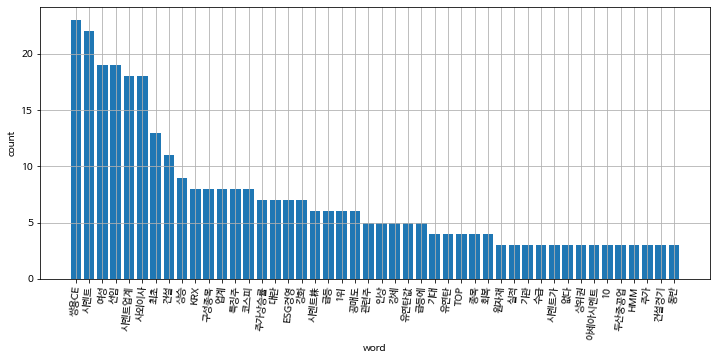

In [ ]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

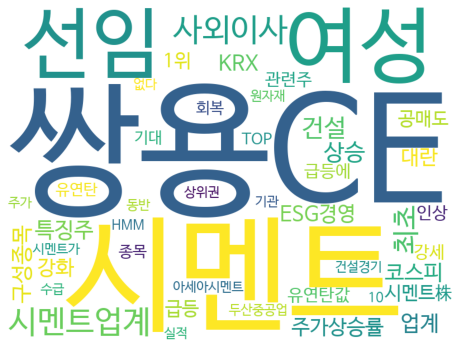

In [ ]:
wc=WordCloud(background_color='white', font_path = font_path, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### 키워드 :

*   **시멘트** : 뉴스 제목 크롤링 결과 빈도수가 2번째로 높은 것으로, 쌍용C&E가 시멘트 대장주이고 시멘트 사업을 하는 회사이므로 '시멘트'라는 키워드가 주가 예측에 영향을 줄 것.
*   **유연탄** : 유연탄이란 시멘트 제조원가의 30~40% 차지하는 주 원료. 



In [ ]:
ssang = pd.read_csv("/content/sample_data/ssang_price.csv")

In [ ]:
ssang

,Date,AVG,coal,cement,coalprice
0,2022-01-09,354600,16,74,34
1,2022-01-16,341100,24,60,0
2,2022-01-23,336400,8,56,33
3,2022-01-30,315300,18,30,38
4,2022-02-06,324000,16,59,0
5,2022-02-13,326800,0,39,0
6,2022-02-20,321500,15,45,0
7,2022-02-27,311400,8,64,33
8,2022-03-06,319500,31,67,100
9,2022-03-13,317750,22,71,0


In [ ]:
coal = np.corrcoef(ssang['AVG'], ssang['coal'])[0,1]
cement = np.corrcoef(ssang['AVG'], ssang['cement'])[0,1]
print("유연탄 : " + str(coal))
print("시멘트 : " + str(cement))

유연탄 : 0.3373114567775126
시멘트 : 0.4713790955256316


## 신한지주

In [ ]:
client_id = "gnndtrcusE4MKxX3qhpp" #발급받은 ID 입력
client_secret = "yk9yEZUB4k" #발급받은 PW 입력
encText = urllib.parse.quote("신한지주") # 검색할 단어 입력
start =1
display = 100
url = "https://openapi.naver.com/v1/search/news?query=" + encText +"&start=" + str(start) + "&display=" + str(display) # json 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    result = response_body.decode('utf-8')
    #print(result)
else:
    print("Error Code:" + rescode)

In [ ]:
result_json = json.loads(result)

In [ ]:
df_shinhan = pd.DataFrame(result_json["items"])

In [ ]:
df_shinhan

,title,originallink,link,description,pubDate
0,환시 외국인배당 역송금 이번주 킥오프…총 10조 원 규모,http://news.einfomax.co.kr/news/articleView.ht...,http://news.einfomax.co.kr/news/articleView.ht...,서울 외환시장에서 외국인 배당금 역송금 시즌이 이번 주 <b>신한</b>금융<b>지...,"Wed, 06 Apr 2022 10:12:00 +0900"
1,"금리·물가급등 최대 수혜는…은행 KB·<b>신한</b>, 보험 DB·현대해상",http://news.heraldcorp.com/view.php?ud=2022040...,https://news.naver.com/main/read.naver?mode=LS...,"은행주는 KB금융과 <b>신한지주</b>, 보험주는 DB손해보험, 현대해상이 최선호...","Wed, 06 Apr 2022 10:12:00 +0900"
2,美국채금리 급등에 보험·은행株 강세,https://www.hankyung.com/finance/article/20220...,https://news.naver.com/main/read.naver?mode=LS...,<b>신한지주</b>(0.50%)와 하나금융<b>지주</b>(0.42%) 등 은행이...,"Wed, 06 Apr 2022 09:47:00 +0900"
3,美 나스닥 '급락' 이어...삼성전자 · LG에너지솔루션 '하락 출발',http://www.choicenews.co.kr/news/articleView.h...,http://www.choicenews.co.kr/news/articleView.h...,"삼성SDI, LG화학, 현대차, 기아, 셀트리온, <b>신한지주</b>, 현대모비스...","Wed, 06 Apr 2022 09:10:00 +0900"
4,20일 '지속가능성 공시기준 제정' 정책제언 포럼,http://news.mt.co.kr/mtview.php?no=20220406082...,https://news.naver.com/main/read.naver?mode=LS...,이후 서정우 KSSB 준비위원회 위원장이 좌장을 맡아 △고석헌 <b>신한지주</b>...,"Wed, 06 Apr 2022 08:40:00 +0900"
...,...,...,...,...,...
95,"러시아·우크라이나 긴장 완화에 코스피 2,750대 상승 마감…기관 순매수 상위...",http://www.topstarnews.net/news/articleView.ht...,http://www.topstarnews.net/news/articleView.ht...,"거래소에서 기관 순매수 상위 종목은 삼성SDI 237억원, LG에너지솔루션 169억...","Thu, 31 Mar 2022 17:42:00 +0900"
96,금융사 너도나도 ESG위원회 설치,http://www.m-i.kr/news/articleView.html?idxno=...,http://www.m-i.kr/news/articleView.html?idxno=...,<b>신한</b>금융<b>지주</b>도 모든 계열사 대표가 참여하는 ESG추진위원회...,"Thu, 31 Mar 2022 17:34:00 +0900"
97,"[마켓뷰] 코스피·코스닥 소폭 상승…러시아·우크라 정전 기대, 국제유가 하...",https://biz.chosun.com/stock/market_trend/2022...,https://news.naver.com/main/read.naver?mode=LS...,"국내 기관은 그 외에도 LG에너지솔루션(373220), <b>신한지주</b>(055...","Thu, 31 Mar 2022 16:57:00 +0900"
98,"3거래일 연속 상승한 코스피, 2750선 진입",https://www.ngetnews.com/news/articleView.html...,https://www.ngetnews.com/news/articleView.html...,"금리 추가 상승 가능성이 높아지면서 KB금융(2.1%), <b>신한지주</b>(0....","Thu, 31 Mar 2022 16:32:00 +0900"


In [ ]:
df_shinhan['title'] = df_shinhan['title'].apply(lambda x: clean_html(x))
df_shinhan['description'] = df_shinhan['description'].apply(lambda x: clean_html(x))

In [ ]:
df_shinhan.head()

,title,originallink,link,description,pubDate
0,환시 외국인배당 역송금 이번주 킥오프…총 10조 원 규모,http://news.einfomax.co.kr/news/articleView.ht...,http://news.einfomax.co.kr/news/articleView.ht...,서울 외환시장에서 외국인 배당금 역송금 시즌이 이번 주 신한금융지주의 배당금 지급부...,"Wed, 06 Apr 2022 10:12:00 +0900"
1,"금리·물가급등 최대 수혜는…은행 KB·신한, 보험 DB·현대해상",http://news.heraldcorp.com/view.php?ud=2022040...,https://news.naver.com/main/read.naver?mode=LS...,"은행주는 KB금융과 신한지주, 보험주는 DB손해보험, 현대해상이 최선호주로 꼽힌다....","Wed, 06 Apr 2022 10:12:00 +0900"
2,美국채금리 급등에 보험·은행株 강세,https://www.hankyung.com/finance/article/20220...,https://news.naver.com/main/read.naver?mode=LS...,신한지주(0.50%)와 하나금융지주(0.42%) 등 은행이 주력인 금융지주도 강세다...,"Wed, 06 Apr 2022 09:47:00 +0900"
3,美 나스닥 '급락' 이어...삼성전자 · LG에너지솔루션 '하락 출발',http://www.choicenews.co.kr/news/articleView.h...,http://www.choicenews.co.kr/news/articleView.h...,"삼성SDI, LG화학, 현대차, 기아, 셀트리온, 신한지주, 현대모비스, SK이노베...","Wed, 06 Apr 2022 09:10:00 +0900"
4,20일 '지속가능성 공시기준 제정' 정책제언 포럼,http://news.mt.co.kr/mtview.php?no=20220406082...,https://news.naver.com/main/read.naver?mode=LS...,이후 서정우 KSSB 준비위원회 위원장이 좌장을 맡아 △고석헌 신한지주 상무 △이인...,"Wed, 06 Apr 2022 08:40:00 +0900"


In [ ]:
# 제목 추출
all_title_shinhan = df_shinhan['title']

all_title_shinhan  # 출력하여 내용 확인

0                    환시 외국인배당 역송금 이번주 킥오프…총 10조 원 규모
1                금리·물가급등 최대 수혜는…은행 KB·신한, 보험 DB·현대해상
2                                美국채금리 급등에 보험·은행株 강세
3            美 나스닥 '급락' 이어...삼성전자 · LG에너지솔루션 '하락 출발'
4                        20일 '지속가능성 공시기준 제정' 정책제언 포럼
                           ...                      
95    러시아·우크라이나 긴장 완화에 코스피 2,750대 상승 마감…기관 순매수 상위...
96                                금융사 너도나도 ESG위원회 설치
97      [마켓뷰] 코스피·코스닥 소폭 상승…러시아·우크라 정전 기대, 국제유가 하...
98                         3거래일 연속 상승한 코스피, 2750선 진입
99       코스피 '또 상승'...삼성SDI · SKC · 효성첨단소재  보험주 '급등'
Name: title, Length: 100, dtype: object

In [ ]:
# 특수문자 제거
import re

def clean_text(inputString):
  text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
  return text_rmv

In [ ]:
shinhan_words = []
for title in all_title_shinhan:
    title = clean_text(title)
    shinhan_words.append(title.split())

In [ ]:
print(shinhan_words)

[['환시', '외국인배당', '역송금', '이번주', '킥오프', '총', '10조', '원', '규모'], ['금리', '물가급등', '최대', '수혜는', '은행', 'KB', '신한', '보험', 'DB', '현대해상'], ['美국채금리', '급등에', '보험', '은행株', '강세'], ['美', '나스닥', '급락', '이어', '삼성전자', 'LG에너지솔루션', '하락', '출발'], ['20일', '지속가능성', '공시기준', '제정', '정책제언', '포럼'], ['전환우선주', '상환전환우선주', '벤처캐피탈이', '선호하는', '까닭'], ['업계', '1위', '신한카드', '딥', '플레이', '로', '초격차', '유지', '도전'], ['Invest', '올해도', '역시', '힘', '못', '쓴', '국민연금', '도마위에', '오른', '수탁자책임위원회'], ['뉴욕증시', '비트코인', '흔들', '러시아', '끝내', '국가부도', '디폴트', 'FOMC', '의사록'], ['회계기준원', '국내', 'ESG', '공시기준', '이해관계자', '의견', '듣는다'], ['새', '정부', '타깃될까', '1분기', '호실적에도', '불안한', '금융사들'], ['상장사에', '부는', '자사주', '취득風'], ['코스피', '0', '05%', '상승', 'FOMC', '의사록', '실적시즌', '관망', '기관', '순매도', '상위', '종목은', '삼'], ['코스피', '관망세', '속', '소폭', '상승', '2700선', '마감'], ['금융거래', '고객정보', '조용병', '신한금융', '회장', '빅테크', '경쟁', '자신하는', '이유'], ['2차전지주', '활짝', '은행주', '울상', '3분', '국내주식'], ['코스피', '0', '05%', '상승', '2', '750대', '강보합으로', '마감'], ['업종별', '순환매', '지속한', '코스피', '종이', '목재↑금융업↓'], ['

In [ ]:
shinhan_words2 = list(reduce(lambda x, y: x+y,shinhan_words))
print(shinhan_words2)  # 작업 내용 확인

['환시', '외국인배당', '역송금', '이번주', '킥오프', '총', '10조', '원', '규모', '금리', '물가급등', '최대', '수혜는', '은행', 'KB', '신한', '보험', 'DB', '현대해상', '美국채금리', '급등에', '보험', '은행株', '강세', '美', '나스닥', '급락', '이어', '삼성전자', 'LG에너지솔루션', '하락', '출발', '20일', '지속가능성', '공시기준', '제정', '정책제언', '포럼', '전환우선주', '상환전환우선주', '벤처캐피탈이', '선호하는', '까닭', '업계', '1위', '신한카드', '딥', '플레이', '로', '초격차', '유지', '도전', 'Invest', '올해도', '역시', '힘', '못', '쓴', '국민연금', '도마위에', '오른', '수탁자책임위원회', '뉴욕증시', '비트코인', '흔들', '러시아', '끝내', '국가부도', '디폴트', 'FOMC', '의사록', '회계기준원', '국내', 'ESG', '공시기준', '이해관계자', '의견', '듣는다', '새', '정부', '타깃될까', '1분기', '호실적에도', '불안한', '금융사들', '상장사에', '부는', '자사주', '취득風', '코스피', '0', '05%', '상승', 'FOMC', '의사록', '실적시즌', '관망', '기관', '순매도', '상위', '종목은', '삼', '코스피', '관망세', '속', '소폭', '상승', '2700선', '마감', '금융거래', '고객정보', '조용병', '신한금융', '회장', '빅테크', '경쟁', '자신하는', '이유', '2차전지주', '활짝', '은행주', '울상', '3분', '국내주식', '코스피', '0', '05%', '상승', '2', '750대', '강보합으로', '마감', '업종별', '순환매', '지속한', '코스피', '종이', '목재↑금융업↓', '업앤다운', '은행주', '하락', 'JB금융↑', '우리금융↓',

In [ ]:
count = Counter(shinhan_words2)

# count  # 출력하여 내용 확인

In [ ]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

코스피 : 25
상승 : 15
신한금융 : 10
마감 : 9
기관 : 5
디지털 : 5
강세 : 4
삼성전자 : 4
1위 : 4
05% : 4
상위 : 4
은행주 : 4
주가 : 4
순매수 : 4
신한 : 3
LG에너지솔루션 : 3
하락 : 3
출발 : 3
러시아 : 3
FOMC : 3
의사록 : 3
1분기 : 3
실적시즌 : 3
조용병 : 3
회장 : 3
경쟁 : 3
2차전지주 : 3
강보합 : 3
외인 : 3
삼성SDI : 3
외국인 : 3
금융주 : 3
더벨 : 3
신종자본증권 : 3
순위 : 3
확대 : 3
만년 : 3
저평가 : 3
하나금융지주 : 3
불확실성 : 3
해소 : 3
유가증권시장 : 3
한주간 : 3
신한은행 : 3
통합 : 3
남산 : 3
위증 : 3
벌금형 : 3


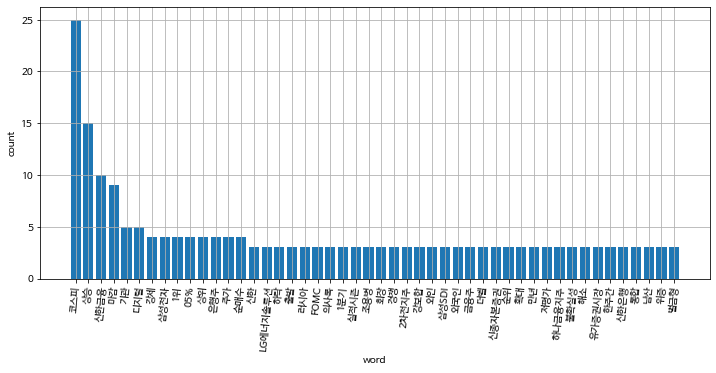

In [ ]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

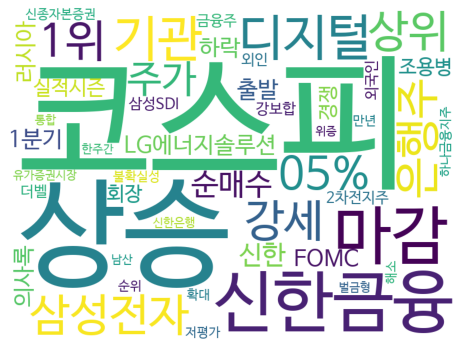

In [ ]:
wc=WordCloud(background_color='white', font_path = font_path, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### 키워드

*   **신한금융**
*   **금리상승**



In [ ]:
bank = pd.read_csv("/content/sample_data/bank_price.csv")

In [ ]:
bank

,Date,AVG,rate,loan,shinhan
0,2022-01-09,354600,100,75,33
1,2022-01-16,341100,85,42,100
2,2022-01-23,336400,30,90,31
3,2022-01-30,315300,51,79,19
4,2022-02-06,324000,69,100,28
5,2022-02-13,326800,54,85,24
6,2022-02-20,321500,37,73,27
7,2022-02-27,311400,30,88,21
8,2022-03-06,319500,30,46,22
9,2022-03-13,317750,0,61,24


In [ ]:
rate = np.corrcoef(bank['AVG'], bank['rate'])[0,1]
shinhan = np.corrcoef(bank['AVG'], bank['shinhan'])[0,1]
print("금리상승 : " + str(rate))
print("신한금융 : " + str(shinhan))

금리상승 : 0.7039904823884431
신한금융 : 0.3854925261613401
